# Survival Analysis in Python

Life expectancy data

Allen B. Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from empyrical_dist import Pmf, Cdf, Surv, Hazard

Read the tables from [National Center for Health Statistics](https://www.cdc.gov/nchs/products/life_tables.htm), specifically [United States Life Tables, 2015. NVSR Volume 67, Number 7. 64pp. (PHS) 2019-1120.](https://www.cdc.gov/nchs/data/nvsr/nvsr67/nvsr67_07-508.pdf)

In [2]:
df = pd.read_csv('data/nvsr67_07-508.csv', thousands=',')
df.index += 1
df.head()

,Age (years),qx,lx,dx,Lx,Tx,ex
1,0–1 . . . . . . . . . . . . . . . . . . . . ....,0.005894,100000,589,99483,7872239,78.7
2,1–2 . . . . . . . . . . . . . . . . . . . . ....,0.000403,99411,40,99391,7772756,78.2
3,2–3 . . . . . . . . . . . . . . . . . . . . ....,0.000252,99371,25,99358,7673366,77.2
4,3–4 . . . . . . . . . . . . . . . . . . . . ....,0.000193,99345,19,99336,7574008,76.2
5,4–5 . . . . . . . . . . . . . . . . . . . . ....,0.000145,99326,14,99319,7474672,75.3


In [3]:
haz = Hazard(df.qx, name='hazard')

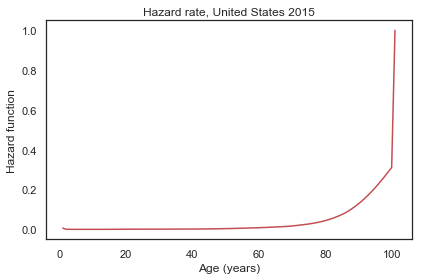

In [4]:
haz.plot(label='', color='C3')
decorate(xlabel='Age (years)',
         ylabel='Hazard function',
         title='Hazard rate, United States 2015')

In [5]:
surv = haz.make_surv(name='survival')
surv.head()

1    0.994106
2    0.993705
3    0.993455
4    0.993263
5    0.993119
Name: survival, dtype: float64

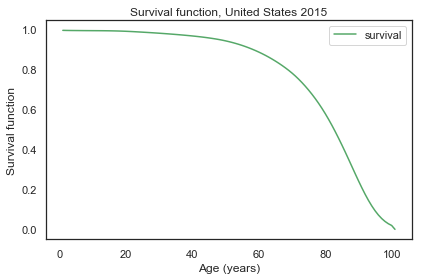

In [6]:
surv.plot()
decorate(xlabel='Age (years)',
         ylabel='Survival function',
         title='Survival function, United States 2015')

In [7]:
cdf = surv.make_cdf()
cdf[1]

0.005893999999999955

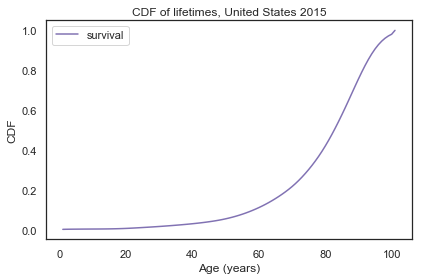

In [18]:
cdf = surv.make_cdf()
cdf.plot(color='C4')
decorate(xlabel='Age (years)',
         ylabel='CDF',
         title='CDF of lifetimes, United States 2015')

In [9]:
pmf = cdf.make_pmf(name='pmf')
pmf[1], pmf[2]

(0.005893999999999955, 0.0004006247180000644)

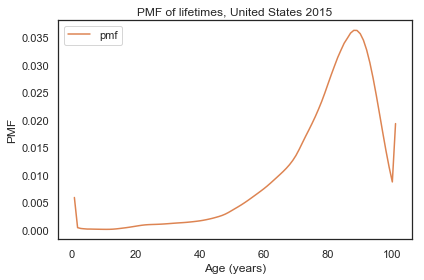

In [10]:
pmf.plot()
decorate(xlabel='Age (years)',
         ylabel='PMF',
         title='PMF of lifetimes, United States 2015')

In [11]:
pmf.mean()

79.1911258128584

In [12]:
conditional_pmf = pmf.copy()
total_expected = pd.Series(index=conditional_pmf.index)

for x in conditional_pmf.qs:
    total_expected[x] = conditional_pmf.mean()
    conditional_pmf[x] = 0
    conditional_pmf.normalize()

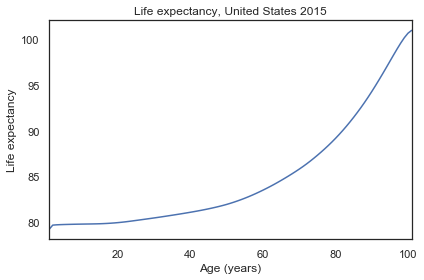

In [16]:
total_expected.plot(label='')
decorate(xlabel='Age (years)',
         ylabel='Life expectancy',
         title='Life expectancy, United States 2015')

In [14]:
conditional_pmf = pmf.copy()
remaining_expected = pd.Series(index=conditional_pmf.index)

for x in conditional_pmf.qs:
    remaining_expected[x] = conditional_pmf.mean() - x
    conditional_pmf[x] = 0
    conditional_pmf.normalize()

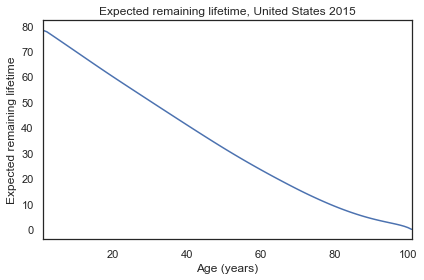

In [17]:
remaining_expected.plot(label='')
decorate(xlabel='Age (years)',
         ylabel='Expected remaining lifetime',
         title='Expected remaining lifetime, United States 2015')